# KNN Using KD-Tree (Group 3A)

### Mostrando la Base de datos

In [3]:
import pandas as pd

df = pd.read_csv('Orange vs Grapefruit.csv')
df

df.shape

(10000, 6)

In [4]:
df.describe()

,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200
std,1.947844,29.212119,10.432954,11.708433,9.061275
min,2.960000,86.760000,115.000000,31.000000,2.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000
75%,11.480000,197.722500,161.000000,84.000000,17.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000


In [6]:
fname = df['name'].unique()
print(fname[0:2])
#type(fname)

['orange' 'grapefruit']


In [8]:
fsize = df.groupby('name',sort=False).size()
fsize
#type(fsize)

name
orange        5000
grapefruit    5000
dtype: int64

In [7]:
df.head(5)

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


#### Cantidad de Datos

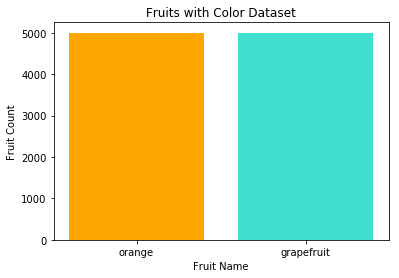

In [9]:
import matplotlib.pyplot as plt
plt.bar(fname,fsize,color = ['orange','turquoise'])
plt.xlabel('Fruit Name')
plt.ylabel('Fruit Count')
plt.title('Fruits with Color Dataset')
plt.show()

#### Datos ubicados por color (RGB)

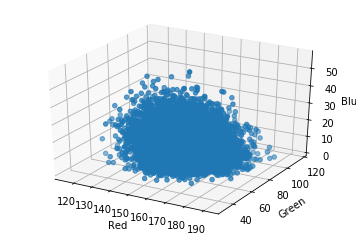

In [10]:
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d') 
ax.scatter(df['red'],df['green'],df['blue'])
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.show()

### Nuestra implemetacion del KD-Tree

In [16]:
import random
import math

In [26]:
k = 5
class Node:
    def __init__(self,point,axis,clase):
        self.point = point
        self.left = None
        self.right = None
        self.axis = axis
        self.clase = clase

def getHeight(node):
    if(node==None):
        return 0
    else:
        return max(getHeight(node.left),getHeight(node.right)) + 1
    
#(0,1,2,3,4,Label)

def build_kdtree(points,depth=0):
    n = len(points)
    axis = depth % k
    if(n<=0):
        return None
    if(n==1):
        return Node(points[0],axis,points[0][k])
    points.sort(key=lambda point: point[axis])
    median = len(points)//2

    node = Node(points[median],axis,points[median][k])
    node.left = build_kdtree(points[:median],depth + 1)
    node.right = build_kdtree(points[median+1:], depth + 1)
    #print("build")
    return node

def distanceSquared(point1,point2):
    distance = 0
    for i in range(k):
        distance+=math.pow(point1[i]-point2[i],2)
    return math.sqrt(distance)

def order(queue):
    for i in range (len(queue)):
        j = i+1
        for j in range (len(queue)):
            if (queue[i][0]>queue[j][0]) :
                temp=queue[i]
                queue[i]=queue[j]
                queue[j]=temp

def priority_queue(queue,point,count):
    if (len(queue)<count):
        queue.append(point)
        sorted(queue,key=lambda point: point[0])
    else:
        for i in range (len(queue)):
            if (queue[i][0]>point[0]):
                temp=queue[i]
                queue[i]=point
                point=temp

def Knearest(node,point,k):
    quever=[]
    k_nearest_point(node,point,quever,k);
    #print(quever)
    indices=[]
    for i in range (len(quever)):
        indices.append(quever[i][1])
    clases= []
    tipo=""
    for nodo in indices:
        clase = nodo[5]
        if clase =='grapefruit':
            tipo="grapefruit"
        if clase == 'orange':
            tipo="orange"
        clases.append(tipo)
    return clases

def k_nearest_point( node , point , queue, k):
    if ( node == None ):
        return
    axis = node.axis
    dist=distanceSquared(point,node.point)
    priority_queue(queue,[dist,node.point],k)
    next_branch = None
    opposite_branch = None
    if (point[axis]<node.point[axis]):
        next_branch=node.left
        opposite_branch=node.right
    else:
        next_branch=node.right
        opposite_branch=node.left
    k_nearest_point(next_branch,point,queue,k)
    if(len(queue)<k or queue[0][0]>abs(point[axis]-node.point[axis])):
        k_nearest_point(opposite_branch,point,queue,k)
        
def most_frequent(List): 
    return max(set(List), key = List.count)

### Construyendo el KD-Tree

In [12]:
Y=df['name']
D1=df['diameter']
D2=df['weight']
R=df['red']
G=df['green']
B=df['blue']

X=[D1,D2,R,G,B,Y]
Points=[]
for i in range(10000):
    aux=(X[0][i],X[1][i],X[2][i],X[3][i],X[4][i],X[5][i])
    Points.append(aux)
X=Points

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test = train_test_split(X,random_state = 0)

In [14]:
kdtree=build_kdtree(x_train)

In [28]:
queue=Knearest(kdtree,x_test[5],7)
print('Test Point : ',x_test[5])

Test Point (11.92, 204.7, 159, 65, 15, 'grapefruit')


In [31]:
if (most_frequent(queue)==x_test[5][5]):
    print("Result : ",most_frequent(queue))

sisis :  grapefruit


### Canculando el Score accuracy 

In [35]:
success_cases=0
for i in range(len(x_test)):
    if (most_frequent(Knearest(kdtree,x_test[i],7))==x_test[i][5]):
        success_cases+=1
print("Accuracy : ",success_cases/len(x_test))

Accuracy :  0.9148
